### HW03: Practice with SVM, kNN, gradient descent, feature engineering

[Please put your name and NetID here.]

### Hello Students:

- Start by downloading HW03.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW03.ipynb to Canvas's HW03.ipynb assignment
  - HW03.html to Canvas's HW03.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from sklearn import svm
import matplotlib.pyplot as plt
import warnings
import numpy as npy
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import export_text # for export_text()

## 1. Visualize classifier decision boundaries.

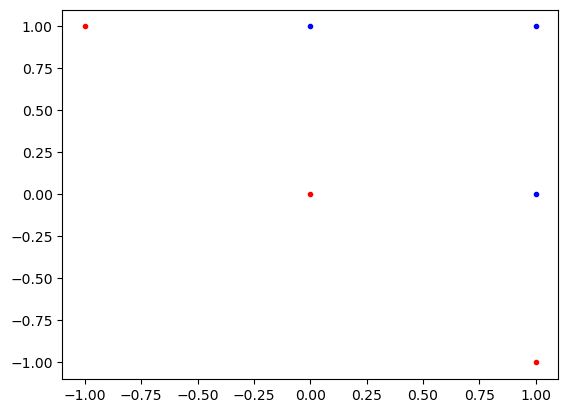

In [3]:
data_string = """
x0, x1,  y
 0,  0, -1
-1,  1, -1
 1, -1, -1
 0,  1,  1
 1,  1,  1
 1,  0,  1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(df[['x0', 'x1']], df['y'])

# Call student's function.
plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1b. Visualize the decision boundary for a decision tree.

|--- x1 <= -0.50
|   |--- class: -1
|--- x1 >  -0.50
|   |--- x0 <= 0.50
|   |   |--- x0 <= -0.50
|   |   |   |--- class: -1
|   |   |--- x0 >  -0.50
|   |   |   |--- x1 <= 0.50
|   |   |   |   |--- class: -1
|   |   |   |--- x1 >  0.50
|   |   |   |   |--- class: 1
|   |--- x0 >  0.50
|   |   |--- class: 1



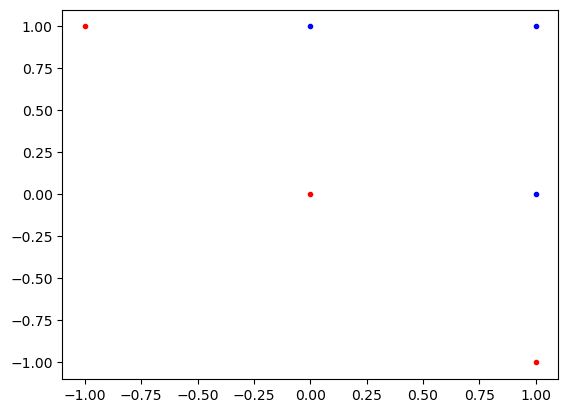

In [4]:
feature_names = ['x0', 'x1']
X = df[feature_names]
y = df.y

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)
print(export_text(clf, feature_names=feature_names))
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 2. Visualize the decision boundary for kNN with $k=3$.
- Make a kNN classifier on the same df used above. (Use n_neighbors=3 and metric='euclidean'.)
- Copy the plotting code again.

(Experiment with $k=1$ and $k=2$ to see how the decision boundary varies with $k$ before setting $k=3$.)

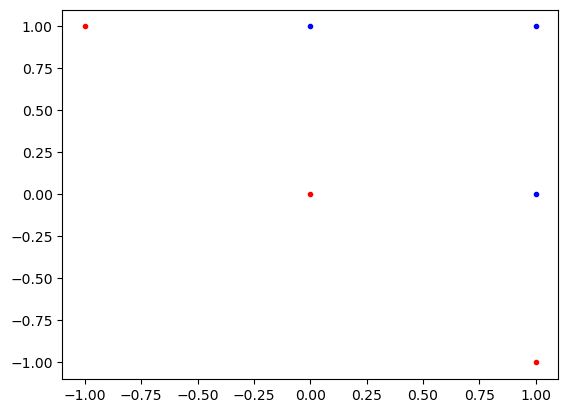

In [5]:
X = df[['x0', 'x1']]
y = df['y']
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

## 3. Practice feature engineering
by exploring the fact that rescaling may be necessary for kNN but not for a decision tree.

### 3a. Read and plot a toy concentric ellipses data set.

- Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv](http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv) into a DataFrame.
- Display the first five rows.
- Plot the data.
  - Put x0 on the $x$ axis and x1 on the $y$ axis.
  - Plot points with these colors:
    - $y=0$: red
    - $y=1$: blue
  - Use $x$ and $y$ axis limits of $(-6, 6)$.
  - Include a legend.

In [6]:
df = pd.read_csv("ellipses.csv")
df[:5]

,x0,x1,y
0,-1.937,-0.006,0
1,-1.622,-0.057,0
2,-0.791,-0.200,0
3,-0.614,-0.171,0
4,-0.490,-0.154,0


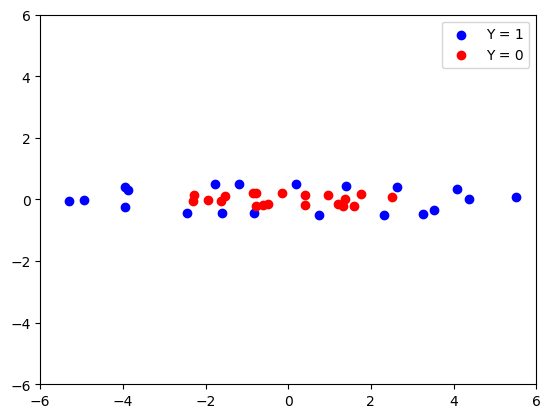

In [7]:
df2 = df[df['y'] == 1]
df3 = df[df['y'] == 0]
plt.scatter(df2['x0'], df2['x1'], c = 'blue')
plt.scatter(df3['x0'], df3['x1'], c = 'red')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.legend(['Y = 1', "Y = 0"])

### 3b. Train a $k$NN classifier and report its accuracy.
- Use $k = 3$ and the (default) euclidean metric.
- Report the accuracy on the training data by writing a line like `Training accuracy is 0.500`
  (0.500 may not be correct).

In [8]:
X = df[['x0', 'x1']]
y = df['y']
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
score = knn.score(X,y)
print(f'Training accuracy is {score}')

Training accuracy is 0.725


### 3c. Now rescale the features using standardization; plot, train, and report accuracy again.
- Fit the scaler to the training features.
- Transform the training features.
- Plot the rescaled data.
- Train kNN again and report its accuracy as before. (Notice that rescaling helped.)

In [9]:
newdf = df.copy(deep = True)
newdf.x1 *= 10

In [10]:
X = newdf[['x0', 'x1']]
y = newdf['y']
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
score = knn.score(X,y)
print(f'Training accuracy is {score}')

Training accuracy is 1.0


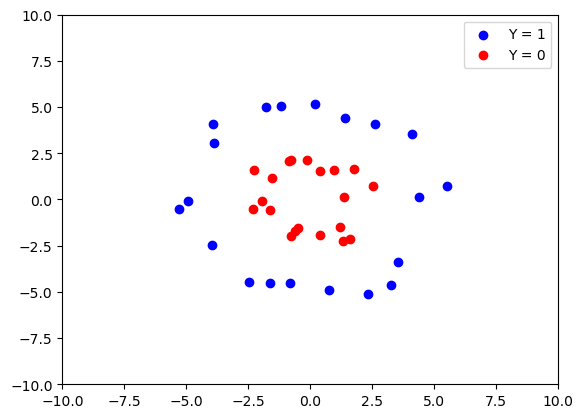

In [11]:
df2 = newdf[newdf['y'] == 1]
df3 = newdf[newdf['y'] == 0]
plt.scatter(df2['x0'], df2['x1'], c = 'blue')
plt.scatter(df3['x0'], df3['x1'], c = 'red')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.legend(['Y = 1', "Y = 0"])

### 3d. Train a decision tree classifier on the original (unscaled) data and report its accuracy.
- Train on the training data.
- Report the accuracy as before.

In [12]:
feature_names = ['x0', 'x1']
X = df[feature_names]
y = df.y
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)
clf.score(X,y)

1.0

### 3e. Why is feature scaling unnecessary for an ID3 decision tree? Answer in a markdown cell.

There is no scaling needed because an ID3 decision tree does not depend on the variance of the data, changing the variance will not change anything